In [13]:
import numpy as np
import xgboost
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def display_digit(digit_vec):
    plt.figure(figsize=(1,1))
    plt.imshow(digit_vec.reshape(8, 8), cmap='gray')
    plt.axis('off')
    
    
def similarity(x, y):
    return (x == y).sum()


def get_similar(query, examples, k):
    similarities = [similarity(query, example) for example in examples]
    sorted_similarities = np.argsort(similarities)[::-1]
    return sorted_similarities[:k]


def show_similarity_results(query, examples, digits, k=5):
    #display_digit(query)
    #plt.title('query digit')
    #plt.show()
    for example in get_similar(query, examples, k):
        print(example)
        display_digit(digits[example])

In [3]:
data = load_digits()
X = data['data']
y = data['target']
num_class = len(set(y))

dtrain = xgboost.DMatrix(X, label=y)

In [4]:
xgb_clf = xgboost.train(
    {'num_class': num_class, 'max_depth': 3},
    dtrain,
    num_boost_round=5
)

[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:09:50] /work

In [5]:
X_pred = xgb_clf.predict(dtrain, pred_leaf=True)

724
1696
854
924
1414


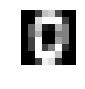

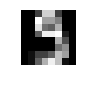

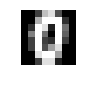

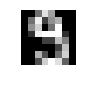

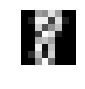

In [16]:
show_similarity_results(query=X_pred[0], examples=X_pred[1:], digits=X)